Overall Instructions:

Please print out values when asked for using python's print() function.
As soon as I open your assignment, I will click "runtime" → "run all". Ensure your notebook displays all answers when this is clicked.

For text answers, like explanations, you can put your answer in comments or in print statements.

## Section 1: Gradients

In [13]:
"""
Q1a (1 mark)
Calculate the gradient of the function: f(x, y, z) = 7z(x^2) – 6x(y^3) + 9z at (-10, 0, 2)
"""

# df(x, y, z) / dx = 14xz - 6(y^3)
# df(x, y, z) / dy = -18x(y^2)
# df(x, y, z) / dz = 7(x^2) + 9
# Gradient = [14xz - 6(y^3), -18x(y^2), 7(x^2) + 9]
# Gradient = [-280, 0, 709]

'\nQ1a (1 mark)\nCalculate the gradient of the function: f(x, y, z) = 7z(x^2) – 6x(y^3) + 9z at (-10, 0, 2)\n'

In [14]:
"""
Q1b (1 mark)
What does the gradient you calculated above represent?
"""
# It is the rate of change with respect to each of the variables in the equation.
# Furthermore, it depicts the acute changes when moving in that given dimensions direction.
# For example, if a point moved slightly from the point (-10, 0, 2) in the x direction,
# it would move the most acutely as its in all three derivatives. Traversly, if you moved
# slightly in the y direction it would move the second most as its in two of the three derivatives.
# Similarly, if moving slightly in the z direction, it would move the least acutely as its only in the first derivative.

'\nQ1b (1 mark)\nWhat does the gradient you calculated above represent?\n'

In [15]:
"""
Q1c (2 marks)
Verify your answer to Q1a numerically.
Specifically, write a function that estimates the partial derivatives of the function with respect to the inputs x, y, and z.
Do this by adding a small perturbation to the input (one input at a time) and observing the change in the value of the function.
"""

def function(x, y, z):
    return 7 * z * x**2 - 6 * x * y**3 + 9 * z

def partial_derivative_x(f, x, y, z, h=1e-3):
    return (f(x + h, y, z) - f(x, y, z)) / h

def partial_derivative_y(f, x, y, z, h=1e-3):
    return (f(x, y + h, z) - f(x, y, z)) / h

def partial_derivative_z(f, x, y, z, h=1e-3):
    return (f(x, y, z + h) - f(x, y, z)) / h

x, y, z = -10, 0, 2

print("partial derivative estimates:")
print(f"original: [-280, 0, 709] calculated: [{partial_derivative_x(function, x, y, z)}, {partial_derivative_y(function, x, y, z)}, {partial_derivative_z(function, x, y, z)}] difference: [{(-280 - partial_derivative_x(function, x, y, z)) * -1}, {(0 - partial_derivative_y(function, x, y, z)) * -1}, {(709 - partial_derivative_z(function, x, y, z)) * -1}]")

partial derivative estimates:
original: [-280, 0, 709] calculated: [-279.9859999997807, 6.0000047596986406e-05, 709.00000000006] difference: [0.014000000219311914, 6.0000047596986406e-05, 6.002665031701326e-11]


## Section 2: Develop a Model

In [16]:
"""
Q2a (1 mark)
Use scikit-learn to load in the Breast Cancer Wisconsin (Diagnostic) dataset.
Scikit-learn has this dataset in its toy datasets: https://scikit-learn.org/stable/datasets/toy_dataset.html
Create a variable that contains the features and another variable that contains the labels. In the tutorials we did exactly this, but for the wine dataset.
"""
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
features = breast_cancer.data
labels = breast_cancer.target

print("Feature shape:", features.shape)
print("Labels shape:", labels.shape)

Feature shape: (569, 30)
Labels shape: (569,)


In [17]:
"""
Q2b (1 mark)

For the data you loaded in Q2a, use scikit-learn's train_test_split functon to create a training set, a validation set, and a test set.
The training set should be 20% of the data, the validation set should be 40% of the data, and the test set should be 40% of the data.
IMPORTANT: use random_seed=42 when splitting the data.
Print out the shapes of the training set, validation set, test set arrays.
"""
from sklearn.model_selection import train_test_split

feature_train, feature_temp, label_train, label_temp = train_test_split(features, labels, test_size=0.8, random_state=42)
feature_val, feature_test, label_val, label_test = train_test_split(feature_temp, label_temp, test_size=0.5, random_state=42)

print("Training set shape:", feature_train.shape)
print("Validation set shape:", feature_val.shape)
print("Test set shape:", feature_test.shape)

Training set shape: (113, 30)
Validation set shape: (228, 30)
Test set shape: (228, 30)


In [18]:
"""
Q2c (1 mark)
Normalize the features (of the breast cancer data) such that the training set has mean 0 and standard deviation 1.
Also normalize the validation set and the test set---but using the statistics (mean and std) from the training set.
Print out the mean and standard deviation of the features in each split.
"""
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_train_normalized = scaler.fit_transform(feature_train)
feature_val_normalized = scaler.transform(feature_val)
feature_test_normalized = scaler.transform(feature_test)

print("Training Set")
print("Mean:", feature_train_normalized.mean(), " Std:", feature_train_normalized.std())

print("\nValidation Set")
print("Mean:", feature_val_normalized.mean(), " Std:", feature_val_normalized.std())

print("\nTest Set")
print("Mean:", feature_test_normalized.mean(), " Std:", feature_test_normalized.std())

Training Set
Mean: -7.545586574443542e-17  Std: 1.0

Validation Set
Mean: 0.004150531049337043  Std: 0.9915427343218985

Test Set
Mean: -0.01642874493777877  Std: 0.97496444114461


In [19]:
"""
Q2d (3 marks)
Use the training set, prepared in Q2c, to train the following models:

1. Scikit-learn's DecisionTreeClassifier with max_depth=1
2. Scikit-learn's DecisionTreeClassifier with max_depth=2
3. Scikit-learn's DecisionTreeClassifier with max_depth=3
4. Scikit-learn's DecisionTreeClassifier with max_depth=4
5. Scikit-learn's DecisionTreeClassifier with max_depth=5
6. Scikit-learn's DecisionTreeClassifier with max_depth=50
7. Scikit-learn's SVC with a 'linear' kernel
8. Scikit-learn's SVC with a 'rbf' kernel
9. Scikit-learn's SVC with a 'poly' kernel

Other than the specified hyper-parameters (i.e., max_depth and kernel type) use default hyper-parameters by not providing them as arguments.

If the algorithm receives random_seed as an argument, always choose random_seed=42; otherwise you may get different results from me!
For each of the 9 models, print out the overall accuracy on the training set and validation set.
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print("DecisionTreeClassifier with max_depth=1")
dtc = DecisionTreeClassifier(max_depth=1, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("DecisionTreeClassifier with max_depth=2")
dtc = DecisionTreeClassifier(max_depth=2, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("DecisionTreeClassifier with max_depth=3")
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("DecisionTreeClassifier with max_depth=4")
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("DecisionTreeClassifier with max_depth=5")
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("DecisionTreeClassifier with max_depth=50")
dtc = DecisionTreeClassifier(max_depth=50, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("SVC with a 'linear' kernel")
svm = SVC(kernel='linear', random_state=42)
svm.fit(feature_train, label_train)

label_train_pred = svm.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = svm.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = svm.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("SVC with a 'rbf' kernel")
svm = SVC(kernel='rbf', random_state=42)
svm.fit(feature_train, label_train)

label_train_pred = svm.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = svm.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = svm.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

print("SVC with a 'poly' kernel")
svm = SVC(kernel='poly', random_state=42)
svm.fit(feature_train, label_train)

label_train_pred = svm.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = svm.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = svm.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}\n")

DecisionTreeClassifier with max_depth=1
Training Accuracy: 0.9469026548672567
Validation Accuracy: 0.9035087719298246
Test Accuracy: 0.8947368421052632

DecisionTreeClassifier with max_depth=2
Training Accuracy: 0.9646017699115044
Validation Accuracy: 0.881578947368421
Test Accuracy: 0.8991228070175439

DecisionTreeClassifier with max_depth=3
Training Accuracy: 0.9823008849557522
Validation Accuracy: 0.8771929824561403
Test Accuracy: 0.8947368421052632

DecisionTreeClassifier with max_depth=4
Training Accuracy: 0.9911504424778761
Validation Accuracy: 0.8640350877192983
Test Accuracy: 0.8947368421052632

DecisionTreeClassifier with max_depth=5
Training Accuracy: 1.0
Validation Accuracy: 0.8728070175438597
Test Accuracy: 0.9035087719298246

DecisionTreeClassifier with max_depth=50
Training Accuracy: 1.0
Validation Accuracy: 0.8728070175438597
Test Accuracy: 0.9035087719298246

SVC with a 'linear' kernel
Training Accuracy: 0.9292035398230089
Validation Accuracy: 0.9736842105263158
Test Ac

In [20]:
"""
Q2e (1 mark)
Based on your results in Q2d, is the data linearly separable? Very briefly explain.
"""

# Yes, the data is linearly separable as all of the validation accuracy results versus
# their counterpart test accuracy results on the same data set with the same training
# model were relatively the same, leading to the data being linearly separable.
# Additionally, the SVC with a 'linear' kernel did exceptionally well in comparison
# to the other training models. Since this is a linear regression training model that depends
# heavily on the data being linearly separable, I can come to an accurate decision that the
# data is linearly separable.

'\nQ2e (1 mark)\nBased on your results in Q2d, is the data linearly separable? Very briefly explain.\n'

In [21]:
"""
Q2f (1 mark)
If your only selection criteria were the overall accuracy, which model would you choose?
Briefly explain your choice. (Hint: remember the roles of train, validation, and test sets.)
"""

# I would choose the SVC with a 'linear' kernel as it yielded the highest validation
# accuracy with an accuracy of around 97%. Although the test accuracy dropped to
# around 92%, a 5% decrease from the validation accuracy, it is still one the highest
# rated accuracy score all around compared to the other training model accuracy results.
# Therefore, the SVC with 'linear' kernel is the best choice out of all the training
# models because the validation results were the highest, provind the accuracy of the
# model is the highest. Additionally, when the test accuracy drops to around 92%,
# it is not necessarily a bad thing as it means that the data is generalized,
# making is easier to correctly identify new data.

'\nQ2f (1 mark)\nIf your only selection criteria were the overall accuracy, which model would you choose?\nBriefly explain your choice. (Hint: remember the roles of train, validation, and test sets.)\n'

In [22]:
"""
Q2g (1 mark)
A woman is told by her doctor that, according to this ML model you developed, she has breast cancer.
Use the test set to estimate the probability that she actually has breast cancer.
"""
from sklearn.metrics import confusion_matrix

svm = SVC(kernel='linear', random_state=42)
svm.fit(feature_train, label_train)

predicted_label = svm.predict(feature_test)
tn, fp, fn, tp = confusion_matrix(label_test, predicted_label).ravel()
precision = round((tp / (tp + fp) * 100), 2)
print("The likelihood of the woman actually having breast cancer is:", precision,"%")

The likelihood of the woman actually having breast cancer is: 97.01 %


## Question 3: Decision Trees

DecisionTreeClassifier with max_depth=100
Training Accuracy: 1.0
Validation Accuracy: 0.8728070175438597
Test Accuracy: 0.9035087719298246


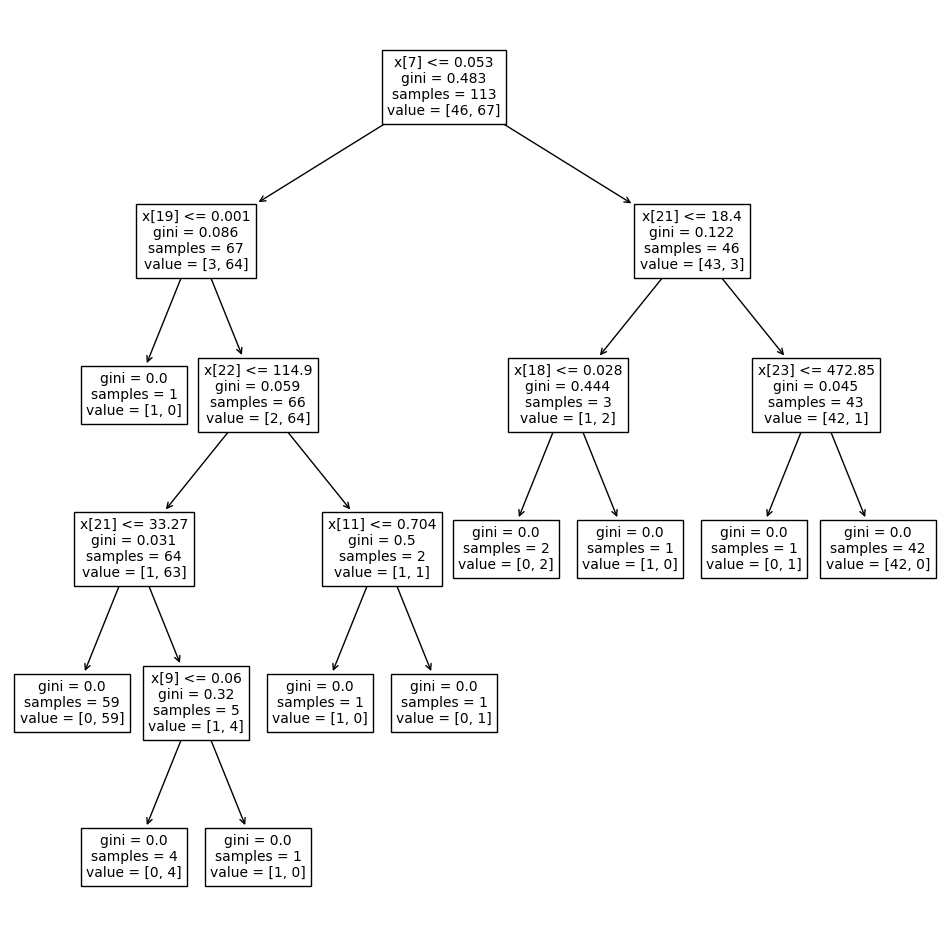


DecisionTreeClassifier with max_depth=100 and splitter='random'
Training Accuracy: 1.0
Validation Accuracy: 0.8903508771929824
Test Accuracy: 0.881578947368421


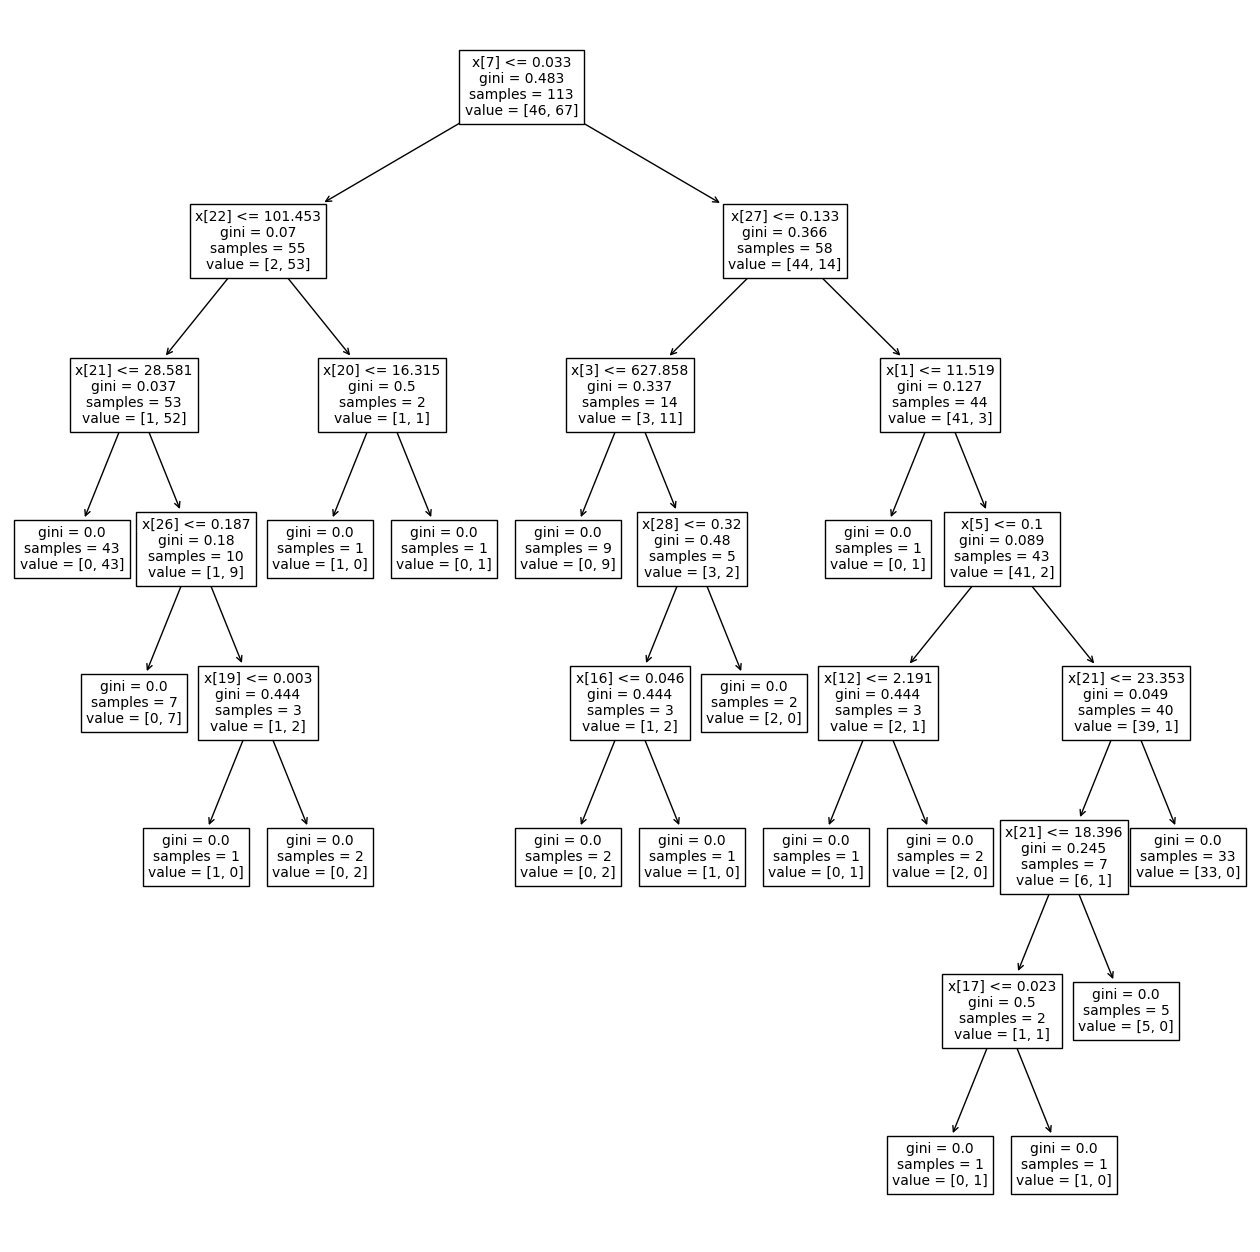

In [23]:
"""
Q3 (2 marks)
Train two decision trees using scikit-learn on the breast cancer training data you prepared in Q2c:
1. DecisionTreeClassifier(max_depth=100, random_state=42)
2. DecisionTreeClassifier(max_depth=100, splitter='random', random_state=42)

Print out the training and validation overall accuracies for each model.
Visualize the trees using sklearn's plot_tree(model) function.

Briefly discuss the differences between the two trees and relate this difference with their ability to generalize.
"""

# Both trees use the Gini Index to measure the likelihood of a random variable being misclassified.
# In both cases, there are multiple instances where there is around a 50/50 chance of a variable being
# misclassified, which is not a good thing as the tree could have more optimal decision paths in this case.
# However, in the first tree, the one without splitter='random' not only are there less points where the tree could have a
# 50/50 chance of being misclassified, the decision points are also majorily lower than even 30% of getting misclassified.
# Furthermore, since the test accuracy is represented as data that hasn't been touched by the model until the end,
# it serves as an accurate indicator for how well a model generalizes data. In the case of these two trees,
# the first tree has a better result when generlizing data with a test accuracy of 90% whereas the second
# decision tree has a test accuracy of 88%, 2% lower than the first tree. Therefore, the first tree is the better
# option, especially in the case of generalizing data.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("DecisionTreeClassifier with max_depth=100")
dtc = DecisionTreeClassifier(max_depth=100, random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}")

plt.figure(figsize=(12,12))
plot_tree(dtc, fontsize=10)
plt.show()

print("\nDecisionTreeClassifier with max_depth=100 and splitter='random'")
dtc = DecisionTreeClassifier(max_depth=100, splitter='random', random_state=42)
dtc.fit(feature_train, label_train)

label_train_pred = dtc.predict(feature_train)
train_acc = accuracy_score(label_train, label_train_pred)
print(f"Training Accuracy: {train_acc}")

label_val_pred = dtc.predict(feature_val)
val_acc = accuracy_score(label_val, label_val_pred)
print(f"Validation Accuracy: {val_acc}")

label_test_pred = dtc.predict(feature_test)
test_acc = accuracy_score(label_test, label_test_pred)
print(f"Test Accuracy: {test_acc}")

plt.figure(figsize=(16,16))
plot_tree(dtc, fontsize=10)
plt.show()